# SVM Model Implementation

## Load the Data Set

In [9]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()


# Subsets for faster training
X_train_subset = X_train_raw[:10000]
y_train_subset = y_train_raw[:10000]

X_test_subset = X_test_raw[:2000]
y_test_subset = y_test_raw[:2000]


#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]

# Make the subset a list
X_train_subset = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_subset]
X_test_subset = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_subset]




## Vectorize and Encode the labels

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


# Join into one big string
corpus_train = [' '.join(item) for item in X_train_raw]
corpus_test = [' '.join(item) for item in X_test_raw]

# Subset into a string
corpus_train_subset = [' '.join(item) for item in X_train_subset]
corpus_test_subset = [' '.join(item) for item in X_test_subset]

# Initialize a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)
# X_train = vectorizer.fit_transform(corpus_train).toarray()
# X_test = vectorizer.fit_transform(corpus_test).toarray()


# Initialize the CountVectorizer, limiting max_features to the top 500 words.
vectorizer = CountVectorizer(max_features=500) 

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_test = vectorizer.transform(corpus_test).toarray()

# Vectorize the Subset
X_train_subset = vectorizer.fit_transform(corpus_train_subset).toarray()
X_test_subset = vectorizer.transform(corpus_test_subset).toarray()


# Encode the taget variables
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_raw)
y_test = encoder.fit_transform(y_test_raw)

y_train_subset = encoder.fit_transform(y_train_subset)
y_test_subset = encoder.fit_transform(y_test_subset)

## Default SVM Model

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


model = SVC(verbose=True)  
model.fit(X_train_subset, y_train_subset)

y_pred = model.predict(X_test_subset)
print("Accuracy:", accuracy_score(y_test_subset, y_pred))
print("\nClassification Report:\n", classification_report(y_test_subset, y_pred))


[LibSVM]....*..*
optimization finished, #iter = 6451
obj = -2657.303234, rho = -0.091203
nSV = 4661, nBSV = 2659
...*..*
optimization finished, #iter = 5448
obj = -893.964746, rho = -0.539916
nSV = 2362, nBSV = 709
....*.*
optimization finished, #iter = 5696
obj = -1523.526058, rho = -0.214224
nSV = 3063, nBSV = 1291
...*..*
optimization finished, #iter = 5197
obj = -1344.704600, rho = -0.444261
nSV = 2819, nBSV = 1120
..*.*
optimization finished, #iter = 3642
obj = -470.351657, rho = -0.769216
nSV = 1724, nBSV = 341
...*..*
optimization finished, #iter = 5483
obj = -1098.370813, rho = -0.606489
nSV = 2617, nBSV = 874
....*..*
optimization finished, #iter = 6740
obj = -1424.994203, rho = -0.195477
nSV = 3165, nBSV = 1145
....*..*
optimization finished, #iter = 6236
obj = -1296.808625, rho = -0.418512
nSV = 2938, nBSV = 1062
..*.*
optimization finished, #iter = 3954
obj = -492.800885, rho = -0.792483
nSV = 1837, nBSV = 344
..*
optimization finished, #iter = 2734
obj = -784.306349, rho =

## Grid-Search 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define SVM model
model = SVC()

# Define parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize Grid Search with recall scorer
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=accuracy_score, cv=3, verbose = True)

# Perform grid search
grid_search.fit(X_train_subset, y_train_subset)

# Best parameters and best recall
print("Best parameters:", grid_search.best_params_)
print("Best Accuracy obtained: {:.2f}".format(grid_search.best_score_))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/carlosrabat/Desktop/AI-Term-Project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosrabat/Desktop/AI-Term-Project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/carlosrabat/Desktop/AI-Term-Project/.venv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/inspect.py", line 3062, in bind
    return self._bind(args, kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/inspect.py", line 2988, in _bind
    raise Ty

Best parameters: {'C': 0.0001, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy obtained: nan


## Optimized SVM Model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Optimized Hyperparameter 
model = SVC(class_weight='balanced', C= 0.1, gamma='scale', kernel='linear')  
model.fit(X_train_subset, y_train_subset)

y_pred = model.predict(X_test_subset)
print("Accuracy:", accuracy_score(y_test_subset, y_pred))
print("\nClassification Report:\n", classification_report(y_test_subset, y_pred))

Accuracy: 0.6445

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       594
           1       0.64      0.74      0.69       710
           2       0.57      0.65      0.61       176
           3       0.76      0.58      0.66       254
           4       0.69      0.43      0.53       200
           5       0.30      0.59      0.40        66

    accuracy                           0.64      2000
   macro avg       0.61      0.61      0.59      2000
weighted avg       0.66      0.64      0.65      2000



## Confusion Matrix for Optimized Model

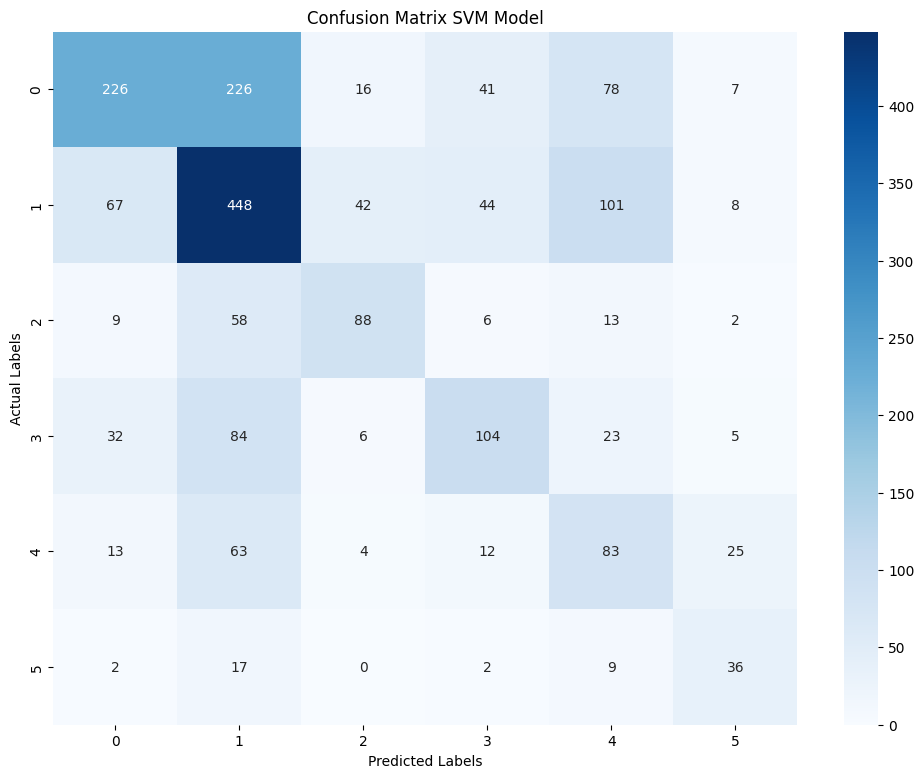

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_subset, y_pred)

x_labels = range(6)
y_labels = range(6)
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(f'Confusion Matrix SVM Model')
plt.show()